In [1]:
import pandas as pd
from Visualization.Molclustpy_visualization_funcitons import *
from data_locator import data_file_finder
import os

search_directory = os.path.join('Examples', 'Nephrin-Nck-NWasp', 'Final_version_test_SIMULATIONS', 'Simulation0_SIM_SIMULATIONS')
path_list = ['data', 'Cluster_stat', 'Histograms', 'Size_Comp_Freq', 'MEAN_Run']
path = data_file_finder(search_directory, path_list, search_term='0.008')

print(path)

Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data\Cluster_stat\Histograms\Size_Comp_Freq\MEAN_Run\MEAN_Run_0.008_Size_Comp_Freq.csv


In [2]:
df = pd.read_csv(path)
df = df.rename({'Size':'Clusters'}, axis = 1)

molecules = df.columns[1].split(',')

df_expanded = df[df.columns[1]].str.split(',', expand=True)
df_expanded.columns = molecules

df = pd.concat([df, df_expanded], axis=1)

for molecule in molecules:
    df[molecule] = df[molecule].astype(float) * df['Frequency in clusters of the same size']

df = df.groupby('Clusters')[molecules].sum().reset_index()

df['row_sum'] = df[molecules].sum(axis=1)

for molecule in molecules:
    df[molecule] = df[molecule] / df['row_sum']

df = df.drop(['row_sum'], axis=1)

outpath = os.path.normpath(path)
outpath = os.path.join(*outpath.split(os.sep)[:-5])

csv_path = os.path.join(outpath, 'pyStat', 'Cluster_composition.csv')
df.to_csv(csv_path)

print(df)

   Clusters     NWASP       NCK   NEPHRIN
0         2  0.383333  0.500000  0.116667
1         3  0.323810  0.655556  0.020635
2         4  0.250000  0.562500  0.187500
3         5  0.250000  0.500000  0.250000
4         8  0.125000  0.625000  0.250000


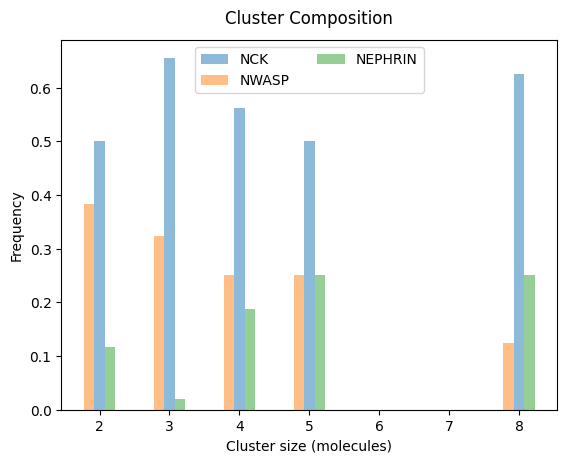

In [3]:
plotClusterCompositionCopy(outpath, specialClusters=[], width=0.15, alpha=0.5)